## CAR PRICE PREDICTION WITH MACHINE LEARNING

##### The price of a car depends on alot of factors like the goodwill of the brand of the car,features of the car,price 
and the mileage,fuel type it gives and many more.Car price prediction is one of the major reaserch areas in 
machine learning.


## importing libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [67]:
df=pd.read_csv("/home/rgukt/Desktop/desktop/ML/quikr_car.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [68]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [69]:
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [70]:
backup=df.copy()

### cleaning the data

In [71]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [72]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [73]:
df=df[df['year'].str.isnumeric()]

In [74]:
df['year']=df['year'].astype(int)

/tmp/ipykernel_14850/1756822702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype(int)


In [75]:
df=df[df['Price']!='Ask For Price']

In [76]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [77]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [78]:
df=df[~df['fuel_type'].isna()]

In [79]:
df.shape

(816, 6)

#### name and company had spammed data ...but with the previous cleaning ,those rows got removed

In [80]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

###### reset the index of the final cleaned data

In [81]:
df=df.reset_index(drop=True)

In [82]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [83]:
df.to_csv('Cleaned_Car_data.csv')

In [84]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816,816
unique,254,25,NaN,NaN,248,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,45000,Petrol
freq,51,221,NaN,NaN,30,428
mean,NaN,NaN,2012.444853,4.117176e+05,NaN,NaN
std,NaN,NaN,4.002992,4.751844e+05,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,NaN,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,NaN,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,NaN,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,NaN,NaN


In [85]:
df=df[df['Price']<6000000]

In [91]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [95]:
print(df['Price'].unique())


[  80000  425000  325000  575000  175000  190000  830000  250000  182000
  315000  415000  320000 1000000  500000  350000  160000  310000   75000
  100000  290000   95000  180000  385000  105000  650000  689999  448000
  549000  501000  489999  280000  349999  284999  345000  499999  235000
  249999 1475000  395000  220000  170000   85000  200000  570000  110000
  448999 1891111  159500  344999  449999  865000  699000  375000  224999
 1200000  195000  351000  240000   90000  155000  600000  189500  210000
  390000  135000 1600000  701000  265000  525000  372000  635000  550000
  485000  329500  251111  569999   69999  299999  399999  450000  270000
  158400  179000  125000  299000  150000  285000  340000   70000  289999
  849999  749999  274999  984999  599999  244999  474999  245000  169500
  275000  370000  168000  145000   98500  209000  185000  900000  699999
  199999  544999  199000  540000   49000  700000   55000  895000  355000
  565000  365000   40000  400000  330000  580000  3

## DATA VISUALIZATION

In [98]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


/tmp/ipykernel_14850/188264903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Price'] = pd.to_numeric(numeric_df['Price'], errors='coerce')  # coerce invalid parsing to NaN


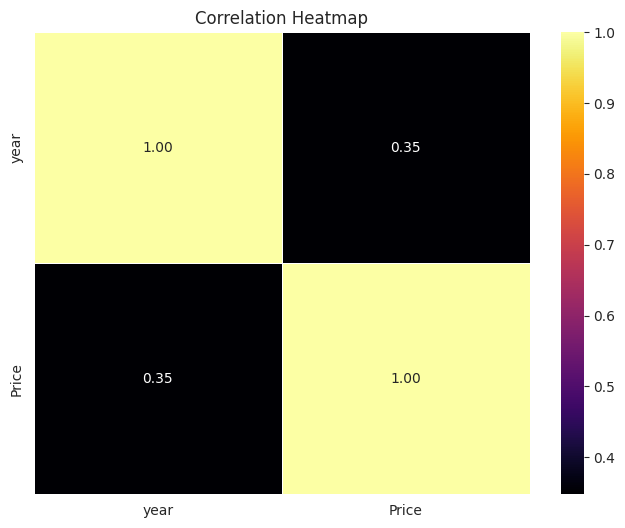

In [100]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
numeric_df['Price'] = pd.to_numeric(numeric_df['Price'], errors='coerce')  # coerce invalid parsing to NaN
numeric_df = numeric_df.dropna()
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


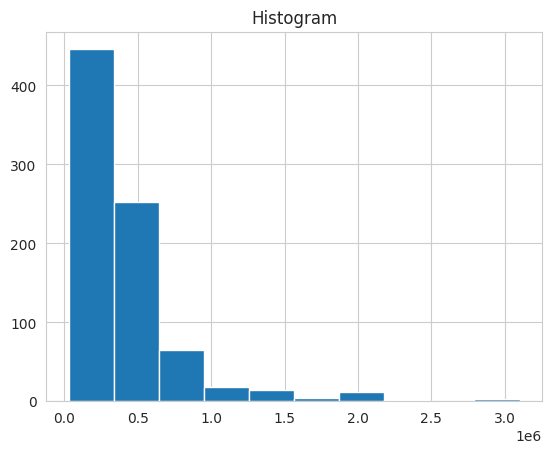

In [101]:
plt.hist(df['Price'])
plt.title("Histogram")
plt.show()

#### checking the relationship of company with price¶

In [102]:
import seaborn as sns

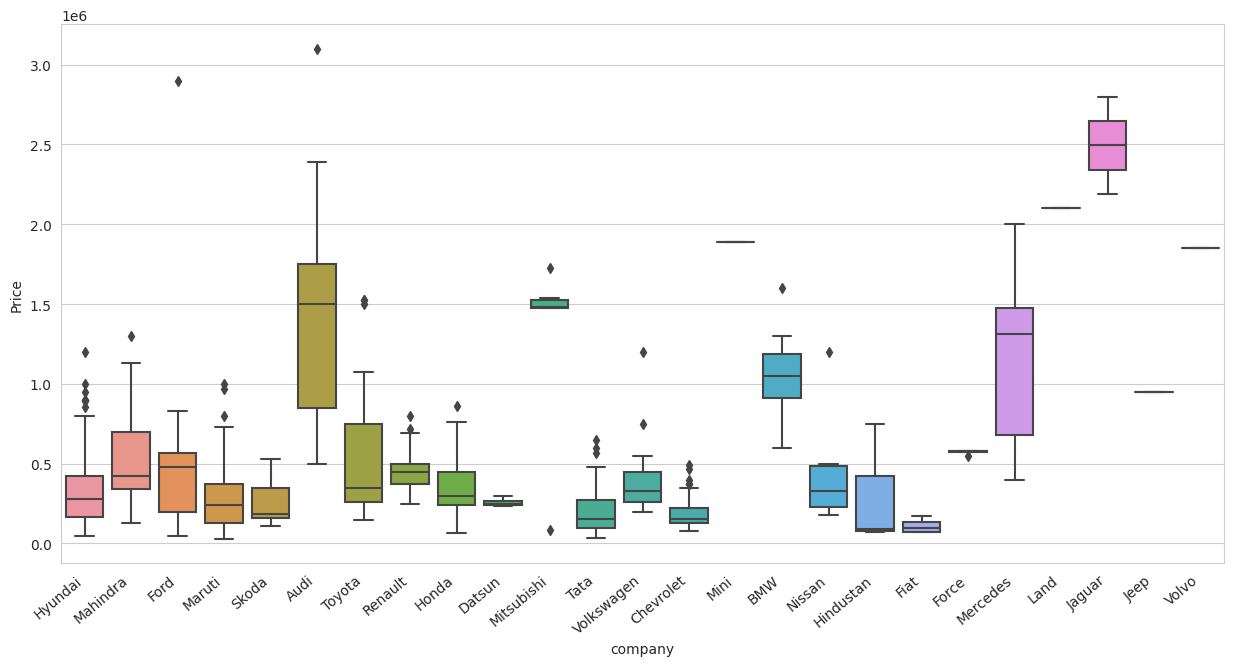

In [103]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### checking the relationship of year with price¶

/home/rgukt/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rgukt/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rgukt/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rgukt/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rgukt/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 

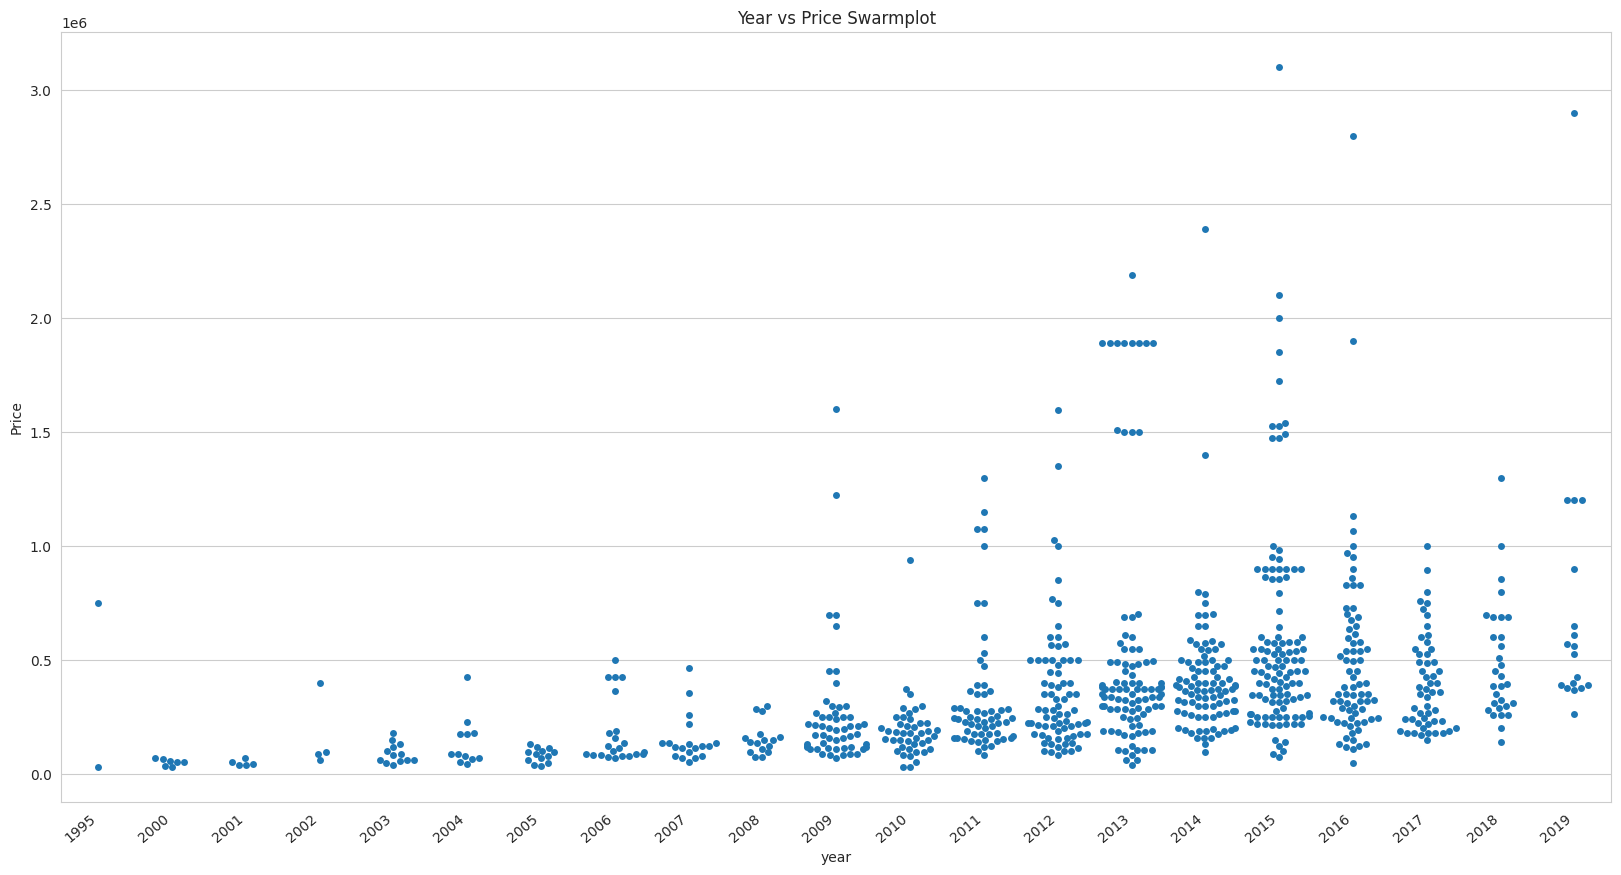

In [105]:
plt.subplots(figsize=(20, 10))
ax = sns.swarmplot(x='year', y='Price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.title('Year vs Price Swarmplot')
plt.show()

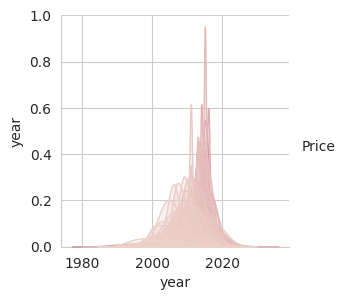

In [106]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df, hue="Price", height=3);
plt.show()

<Axes: xlabel='fuel_type', ylabel='Price'>

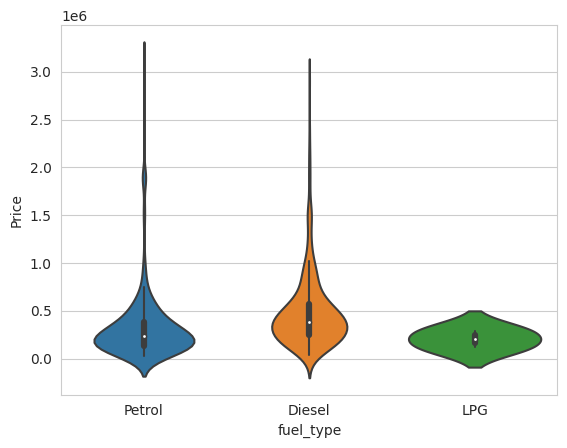

In [107]:
sns.violinplot(x='fuel_type',y='Price',data=df,size=6)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

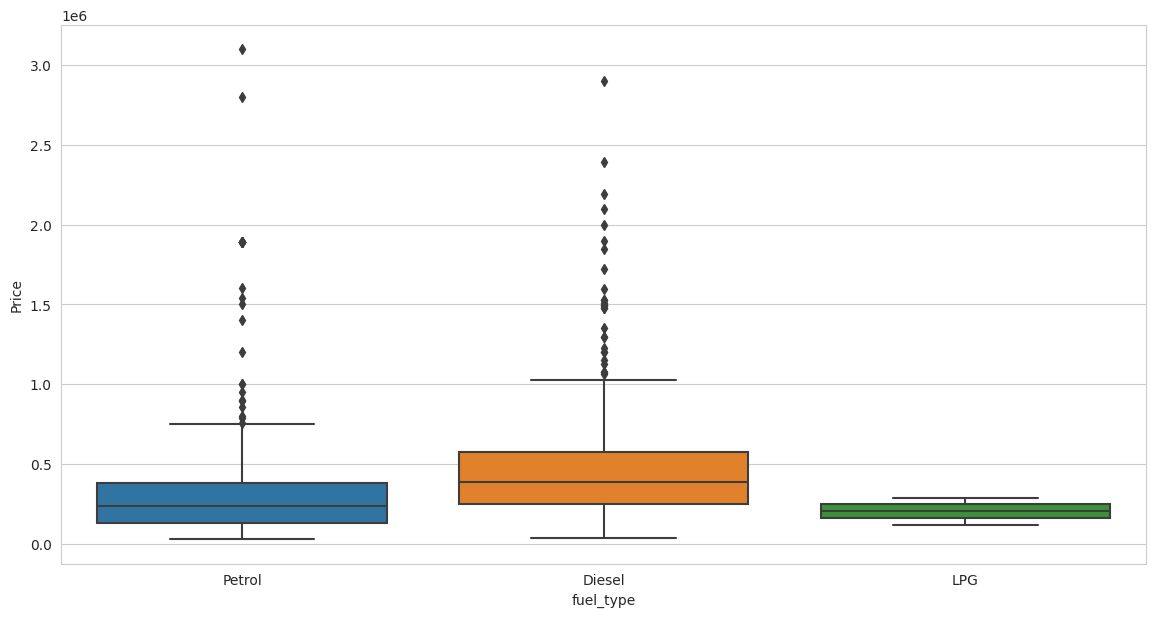

In [34]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)

### Relationship of Price with FuelType, Year and Company mixed

### jointplot

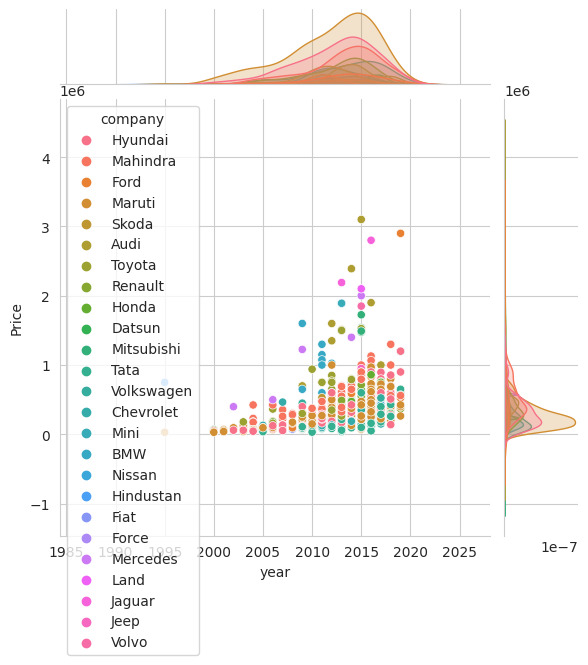

In [108]:
sns.jointplot(data=df, x="year", y="Price", hue="company")

In [109]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

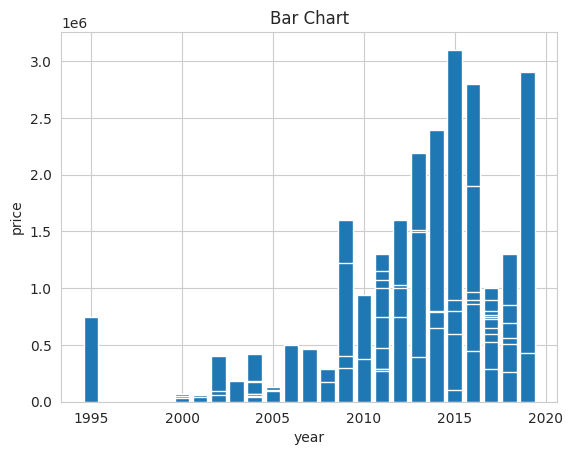

In [110]:
plt.bar(df['year'],df['Price'])
plt.title("Bar Chart")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

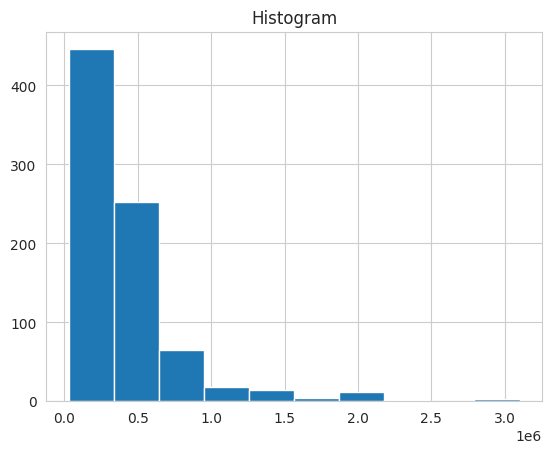

In [111]:
plt.hist(df['Price'])
plt.title("Histogram")
plt.show()

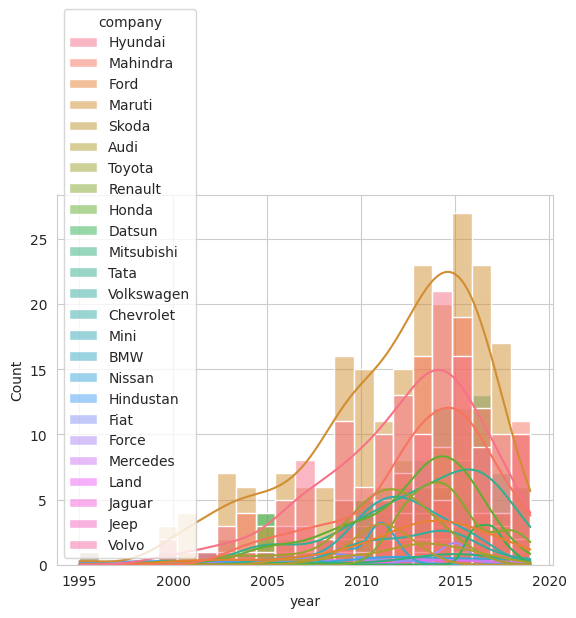

In [112]:
import seaborn as sns
sns.histplot(x='year', data=df,kde=True,hue='company')
plt.show()

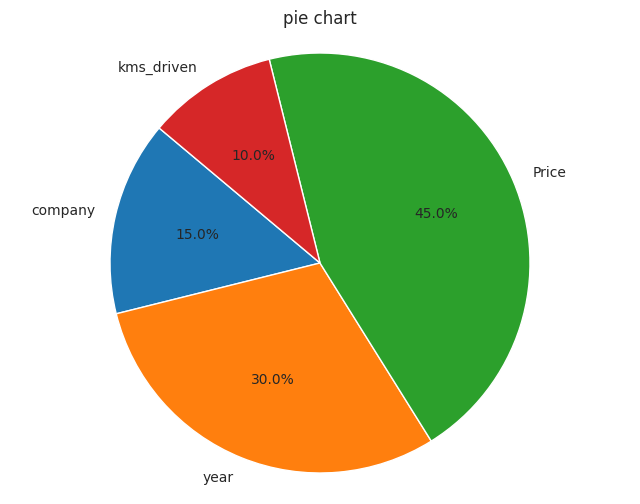

In [113]:
import matplotlib.pyplot as plt
labels=['company', 'year', 'Price', 'kms_driven']
sizes=[15,30,45,10]
plt.figure(figsize=(8,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('pie chart')
plt.axis('equal')
plt.show()

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt


### Extracting Training Data

In [115]:
X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [116]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [117]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int64

In [118]:
y.shape

(815,)

### Applying Train Test split

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### Creating an OneHotEncoder object to contain all the possible categories

### Creating a column transformer to transform categorical columns

In [123]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

### Linear Regression

In [124]:
lr=LinearRegression()

### Making a pipeline

In [125]:
from sklearn.pipeline import Pipeline

In [126]:
pipe=make_pipeline(column_trans,lr)

### Fitting the model¶

### pipe.fit(X_train,y_train)

In [127]:
# Assuming you have defined your pipeline as 'pipe' and your data is ready
pipe.fit(X_train, y_train)

# Now that the pipeline is fitted, you can make predictions
y_pred = pipe.predict(X_test)


### Checking R2 Score

In [128]:
r2_score(y_test,y_pred)

0.5982530528710329

##### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_scor

In [129]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [130]:
np.argmax(scores)

302

In [131]:
scores[np.argmax(scores)]

0.8991157554877304

In [132]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430301.37134528])

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304